In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing

In [2]:
df=pd.read_csv('customer_retention_data.csv')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [3]:
df.shape

(269, 71)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [5]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [6]:
df.columns # all the columns of the dataset.

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


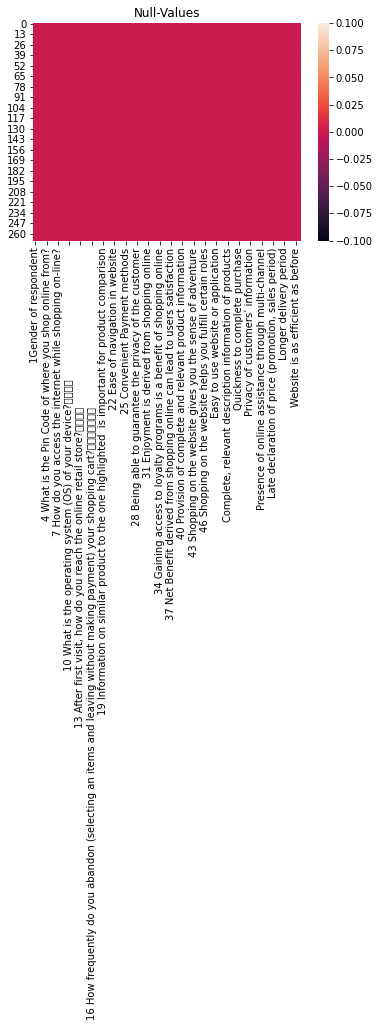

In [8]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- There are no null-values in the dataset.

## EDA 

In [9]:
# exploring the categorical columns of the dataframe.
for column in df.columns:
    if df[column].dtypes == object:
        print( str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('--------------------------------')
        
    print('\n')

1Gender of respondent : ['Male' 'Female']
Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
--------------------------------


2 How old are you?  : ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64
--------------------------------


3 Which city do you shop online from? : ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
--------------------------------




5 Since How Long You are Shopping Online ? : ['Above 4 years' '3-

## Data Visualization 

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


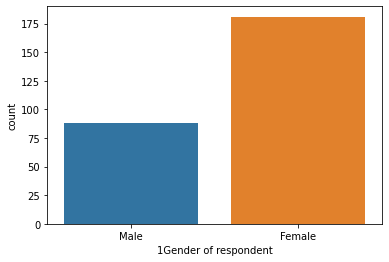

In [10]:
# Gender of respondent
ax=sns.countplot(x='1Gender of respondent',data=df)
print(df['1Gender of respondent'].value_counts())

- The no of females participated in the survey is higher than that of the males.

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

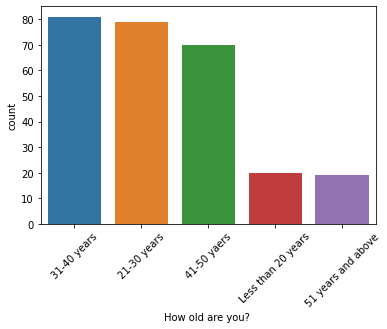

In [11]:
# Age of participants 
sns.countplot(x="2 How old are you? ", data=df)
plt.xticks(rotation=45)
plt.xlabel('How old are you? ')

df['2 How old are you? '].value_counts()

- The no of people who participated in the survey is highest among 31-40 years of age group and least from 51 years and above.

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

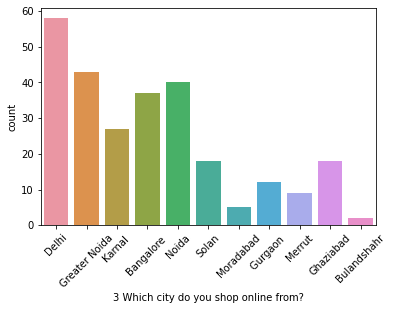

In [12]:
# Which city do you shop online from
sns.countplot(x="3 Which city do you shop online from?", data=df)
plt.xticks(rotation=45)
df['3 Which city do you shop online from?'].value_counts()

- The highest no of people shopping is for the city Delhi and least is for the Bulandshahr
- From the highest and least no of people shopping from the respective cities tells us that it is becuase of region falling under metro region.

201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303     4
560013     3
203001     2
560001     1
203207     1
203202     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64

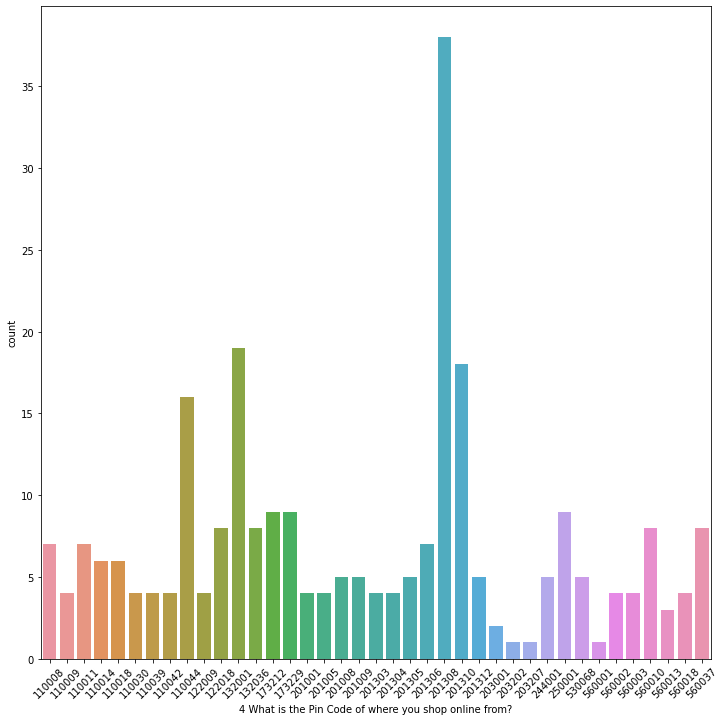

In [13]:
# Pin Code of where shoping online
plt.subplots(figsize=(12,12))
sns.countplot(x="4 What is the Pin Code of where you shop online from?", data=df)
plt.xticks(rotation= 45)
df['4 What is the Pin Code of where you shop online from?'].value_counts()

- The highest no of people shopping is from the region with pic code as 201308 and least if from 560001,203207 and 203202.

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

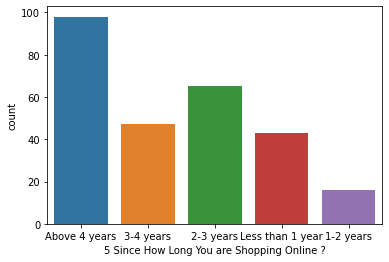

In [14]:
# How Long Shopping Online ?
sns.countplot(x="5 Since How Long You are Shopping Online ?", data=df)
plt.xticks(rotation=0)
plt.xlabel('5 Since How Long You are Shopping Online ?')

df['5 Since How Long You are Shopping Online ?'].value_counts()

- Th majority of people who have been shopping more than 4 years is highest and new customers have been adding from past 1-2 years.

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

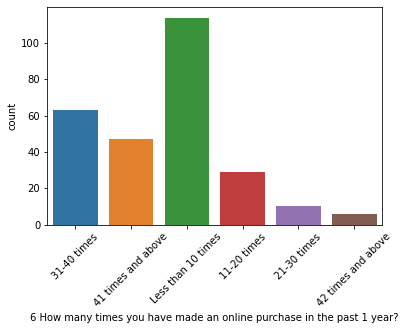

In [15]:
# How many times you have made an online purchase in the past 1 year?
sns.countplot(x="6 How many times you have made an online purchase in the past 1 year?", data=df)
plt.xticks(rotation=45)
plt.xlabel('6 How many times you have made an online purchase in the past 1 year?')

df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

- The no of people who have been shopping online for about 42 times and above is very less whereas people shopping less than 10 times a year is the highest.

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

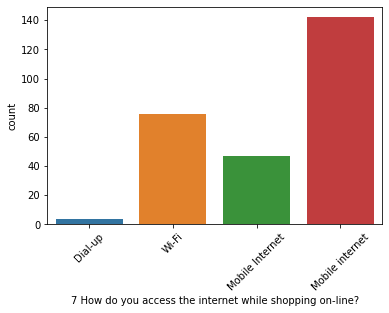

In [16]:
# How do you access the internet while shopping on-line?
sns.countplot(x="7 How do you access the internet while shopping on-line?", data=df)
plt.xticks(rotation=45)
plt.xlabel('7 How do you access the internet while shopping on-line?')

df['7 How do you access the internet while shopping on-line?'].value_counts()

- Using Mobile Internet for shopping online is the most preferred way of internet access and Dial-up is the least prefered way.

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

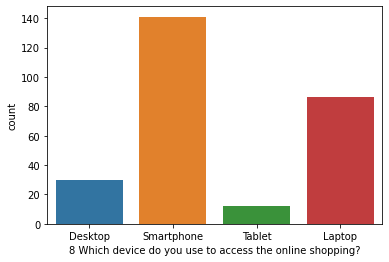

In [17]:
# Which device do you use to access the online shopping?
sns.countplot(x="8 Which device do you use to access the online shopping?", data=df)
plt.xlabel('8 Which device do you use to access the online shopping?')

df['8 Which device do you use to access the online shopping?'].value_counts()

- Smartphone is the most preferred device for online shopping and tablet is the least preferred.
- The reason for smartphones being popular choice for online shopping might be because of the online shopping website present in application format.

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64

/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


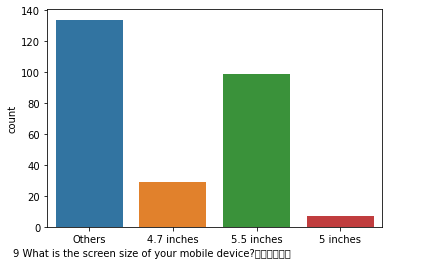

In [18]:
# What is the screen size of your mobile device?                                   
sns.countplot(x="9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ", data=df)
plt.xlabel('9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ')

df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '].value_counts()

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64

/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


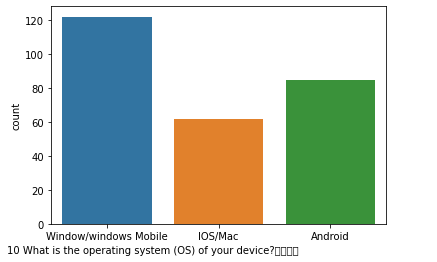

In [19]:
# What is the operating system (OS) of your device?                                     
sns.countplot(x="10 What is the operating system (OS) of your device?\t\t\t\t                                          ", data=df)
plt.xlabel('10 What is the operating system (OS) of your device?\t\t\t\t                                          ')

df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '].value_counts()

- Windows oerating system is the most popular choice among online shoppers whereas IOS/Mac is the least preferred option.

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64

/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


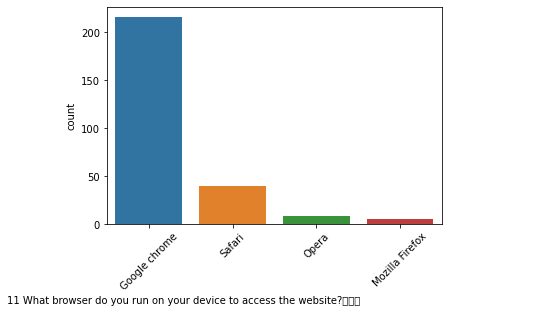

In [20]:
# What browser do you run on your device to access the website?                                                        
sns.countplot(x="11 What browser do you run on your device to access the website?\t\t\t                                                          ", data=df)
plt.xlabel('11 What browser do you run on your device to access the website?\t\t\t                                                          ')
plt.xticks(rotation=45)

df['11 What browser do you run on your device to access the website?\t\t\t                                                          '].value_counts()

- Google crome browser is the most poular choice among people who shop online and Mozilla Firefox is the least preferred one.

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64

/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Shivani/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


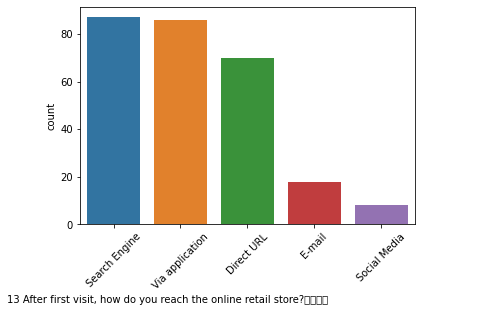

In [21]:
# Which channel did you follow to arrive at your favorite online store for the first time?                                              
sns.countplot(x="13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ", data=df)
plt.xticks(rotation=45)
plt.xlabel('13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ')

df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '].value_counts()

- Most people use the Search Engine to reach out the online retail store.

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

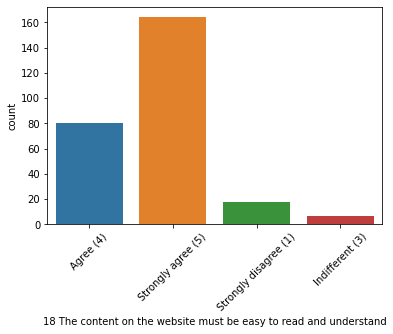

In [22]:
# The content on the website must be easy to read and understand
sns.countplot(x="18 The content on the website must be easy to read and understand", data=df)
plt.xlabel('18 The content on the website must be easy to read and understand')
plt.xticks(rotation=45)
df['18 The content on the website must be easy to read and understand'].value_counts()

- Most of the people agree that content on the website must be easy to read and understand , while some people disagree also with it.

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64

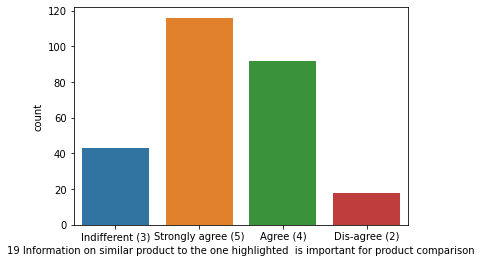

In [23]:
# Information on similar product to the one highlighted is important for product comparison
sns.countplot(x="19 Information on similar product to the one highlighted  is important for product comparison", data=df)
plt.xlabel('19 Information on similar product to the one highlighted  is important for product comparison')

df['19 Information on similar product to the one highlighted  is important for product comparison'].value_counts()

- Most of the customers strongly agree that the Information on similar product to the one highlighted is important for product comparison

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

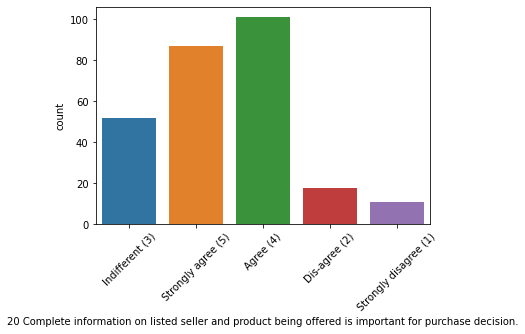

In [24]:
# Complete information on listed seller and product being offered is important for purchase decision.
sns.countplot(x="20 Complete information on listed seller and product being offered is important for purchase decision.", data=df)
plt.xlabel('20 Complete information on listed seller and product being offered is important for purchase decision.')
plt.xticks(rotation=45)

df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

- Most of the customers agree that the Complete information on listed seller and product being offered is important for purchase decision

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64

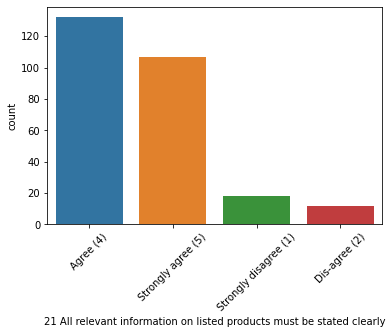

In [25]:
# All relevant information on listed products must be stated clearly
sns.countplot(x="21 All relevant information on listed products must be stated clearly", data=df)
plt.xlabel('21 All relevant information on listed products must be stated clearly')
plt.xticks(rotation=45)

df['21 All relevant information on listed products must be stated clearly'].value_counts()

- Most of the customers agree that all relevant information on listed products must be stated clearly

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64

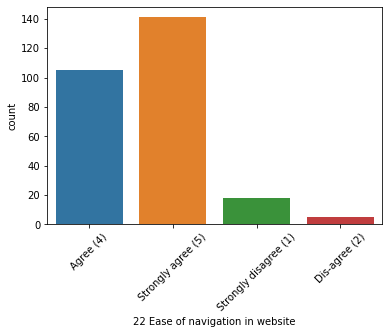

In [26]:
# Ease of navigation in website
sns.countplot(x="22 Ease of navigation in website", data=df)
plt.xlabel('22 Ease of navigation in website')
plt.xticks(rotation=45)

df['22 Ease of navigation in website'].value_counts()

- Most of the customers strongly agree that Ease of navigation in website is necessary.

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Indifferent (3)           12
Strongly disagree (1)     12
Name: 23 Loading and processing speed, dtype: int64

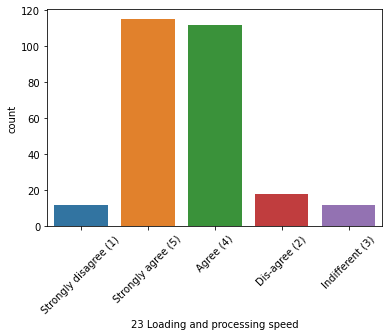

In [27]:
# Loading and processing speed
sns.countplot(x="23 Loading and processing speed", data=df)
plt.xticks(rotation=45)
plt.xlabel('23 Loading and processing speed')

df['23 Loading and processing speed'].value_counts()

- Most of the customers strongly agree to Loading and processing speed of website followed by agree.

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64

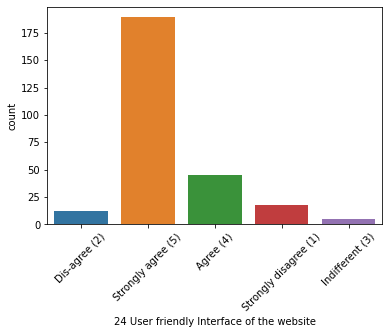

In [28]:
# User friendly Interface of the website
sns.countplot(x="24 User friendly Interface of the website", data=df)
plt.xlabel('24 User friendly Interface of the website')
plt.xticks(rotation=45)

df['24 User friendly Interface of the website'].value_counts()

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64

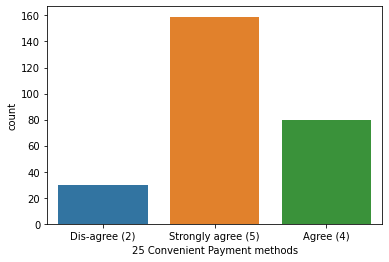

In [29]:
# Convenient Payment methods
sns.countplot(x="25 Convenient Payment methods", data=df)
plt.xlabel('25 Convenient Payment methods')

df['25 Convenient Payment methods'].value_counts()

- Most of the customers strongly agree that Convenient Payment methods must be available on website

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64

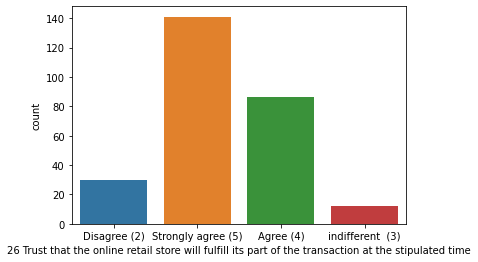

In [30]:
# Trust that the online retail store will fulfill its part of the transaction at the stipulated time
sns.countplot(x="26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time", data=df)
plt.xlabel('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time')

df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts()

- Most of the customers Strongly agree that the online retail store will fulfill its part of the transaction at the stipulated time

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64

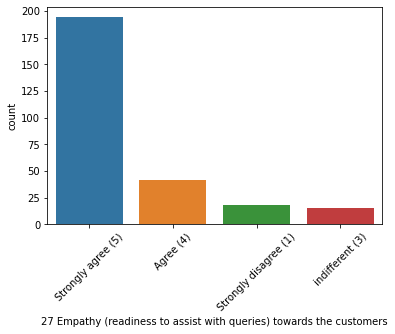

In [31]:
# Empathy (readiness to assist with queries) towards the customers
sns.countplot(x="27 Empathy (readiness to assist with queries) towards the customers", data=df)
plt.xticks(rotation=45)
plt.xlabel('27 Empathy (readiness to assist with queries) towards the customers')

df['27 Empathy (readiness to assist with queries) towards the customers'].value_counts()

- Most of the customers strongly agree to Empathy (readiness to assist with queries) towards the customers

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64

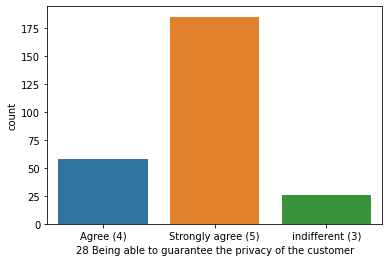

In [32]:
# Being able to guarantee the privacy of the customer
sns.countplot(x="28 Being able to guarantee the privacy of the customer", data=df)
plt.xticks(rotation=0)
plt.xlabel('28 Being able to guarantee the privacy of the customer')

df['28 Being able to guarantee the privacy of the customer'].value_counts()

- Most of the customers strongly agree that the customer privacy is important.

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64

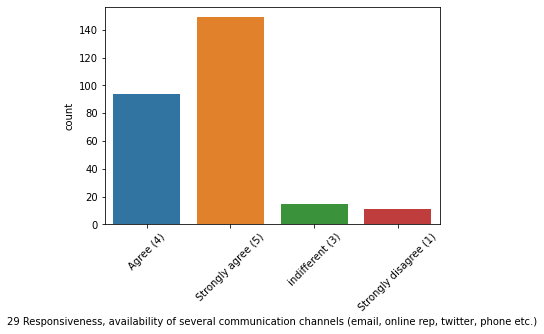

In [33]:
# Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
sns.countplot(x="29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)", data=df)
plt.xticks(rotation=45)
plt.xlabel('29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)')

df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts()

- Most of the customers strongly agree to Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64

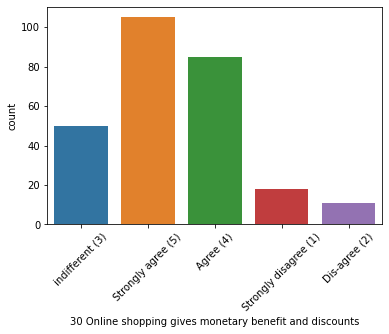

In [34]:
# Online shopping gives monetary benefit and discounts
sns.countplot(x="30 Online shopping gives monetary benefit and discounts", data=df)
plt.xticks(rotation=45)
plt.xlabel('30 Online shopping gives monetary benefit and discounts')

df['30 Online shopping gives monetary benefit and discounts'].value_counts()

- Most of the customers Strongly agree that Online shopping gives monetary benefit and discounts

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64

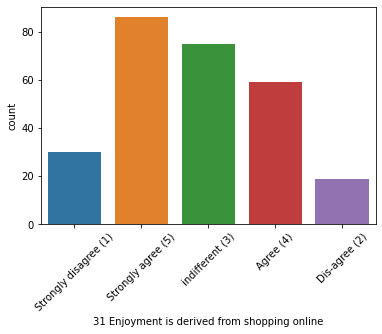

In [35]:
# Enjoyment is derived from shopping online
sns.countplot(x="31 Enjoyment is derived from shopping online", data=df)
plt.xticks(rotation=45)
plt.xlabel('31 Enjoyment is derived from shopping online')

df['31 Enjoyment is derived from shopping online'].value_counts()

- 86 customers Strongly agree that Enjoyment is derived from shopping online

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64

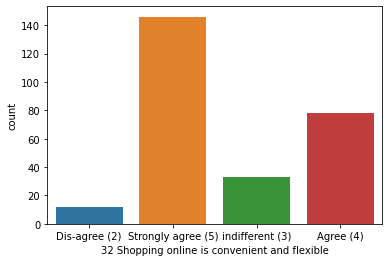

In [36]:
#checking the column 32 Shopping online is convenient and flexible
sns.countplot(x="32 Shopping online is convenient and flexible", data=df)
plt.xticks(rotation=0)
plt.xlabel('32 Shopping online is convenient and flexible')

df['32 Shopping online is convenient and flexible'].value_counts()

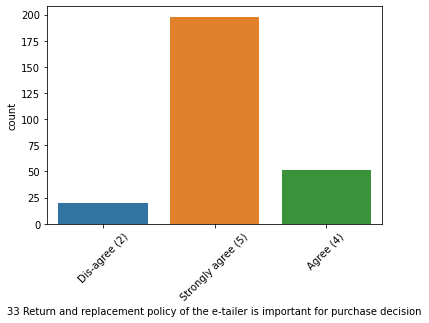

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64

In [37]:
# Return and replacement policy of the e-tailer is important for purchase decision
sns.countplot(x="33 Return and replacement policy of the e-tailer is important for purchase decision", data=df)
plt.xticks(rotation=45)
plt.xlabel('33 Return and replacement policy of the e-tailer is important for purchase decision')
plt.ylabel("count")
plt.show()

df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts()

- Most of the customers strongly agree to Shopping online is convenient and flexible

Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64

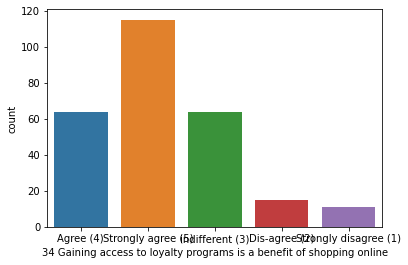

In [38]:
# Gaining access to loyalty programs is a benefit of shopping online
sns.countplot(x="34 Gaining access to loyalty programs is a benefit of shopping online", data=df)
plt.xticks(rotation=0)
plt.xlabel('34 Gaining access to loyalty programs is a benefit of shopping online')

df['34 Gaining access to loyalty programs is a benefit of shopping online'].value_counts()

- Most of the customers Strongly agree to Return and replacement policy of the e-tailer is important for purchase decision

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64

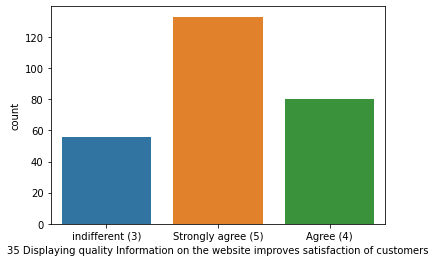

In [39]:
# Displaying quality Information on the website improves satisfaction of customers
sns.countplot(x="35 Displaying quality Information on the website improves satisfaction of customers", data=df)
plt.xlabel('35 Displaying quality Information on the website improves satisfaction of customers')

df['35 Displaying quality Information on the website improves satisfaction of customers'].value_counts()

- Most of the customers Strongly agree that displaying quality Information on the website improves satisfaction of customers

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64

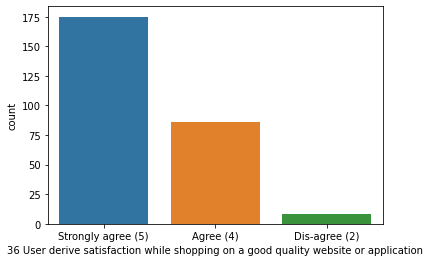

In [40]:
# User derive satisfaction while shopping on a good quality website or application
sns.countplot(x="36 User derive satisfaction while shopping on a good quality website or application", data=df)
plt.xlabel('36 User derive satisfaction while shopping on a good quality website or application')

df['36 User derive satisfaction while shopping on a good quality website or application'].value_counts()

- Most of the customers Strongly agree to User derive satisfaction while shopping on a good quality website or application

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64

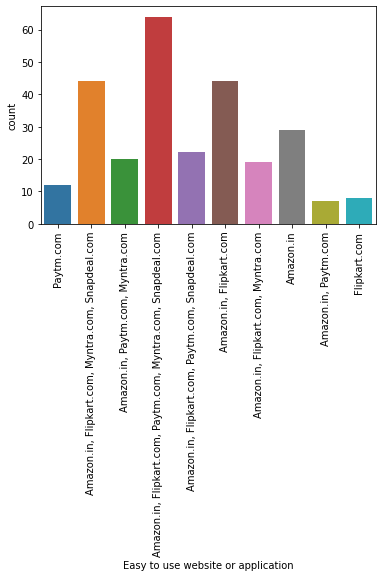

In [41]:
# Easy to use website or application
sns.countplot(x="Easy to use website or application", data=df)
plt.xticks(rotation=90)
plt.xlabel('Easy to use website or application')

df['Easy to use website or application'].value_counts()

- Majority of the customers agree that Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are Easy to use website or application

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Flipkart.com, Myntra.com                                        15
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64

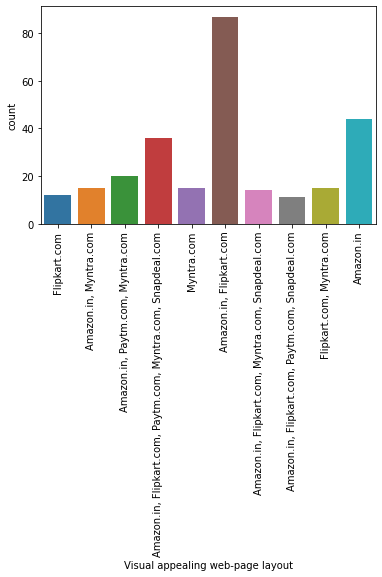

In [42]:
# Visual appealing web-page layout
sns.countplot(x="Visual appealing web-page layout", data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Visual appealing web-page layout')

df['Visual appealing web-page layout'].value_counts()

- Majority of the customers agree that Amazon.in, Flipkart.com have better Visual appealing web-page layout

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64

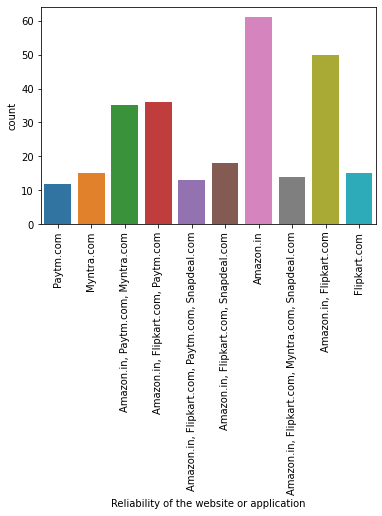

In [43]:
# Reliability of the website or application
sns.countplot(x="Reliability of the website or application", data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Reliability of the website or application')

df['Reliability of the website or application'].value_counts()

- Majority of the customers agree that Amazon.in Reliability of the website or application

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64

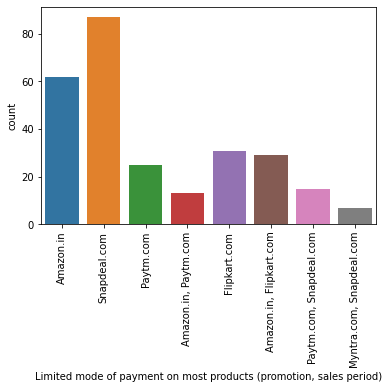

In [44]:
# Limited mode of payment on most products (promotion, sales period)
sns.countplot(x="Limited mode of payment on most products (promotion, sales period)", data=df)
plt.xticks(rotation='90')
plt.xlabel('Limited mode of payment on most products (promotion, sales period)')

df['Limited mode of payment on most products (promotion, sales period)'].value_counts()

- Majority of the customers agree that Amazon.in Reliability of the website or application

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64

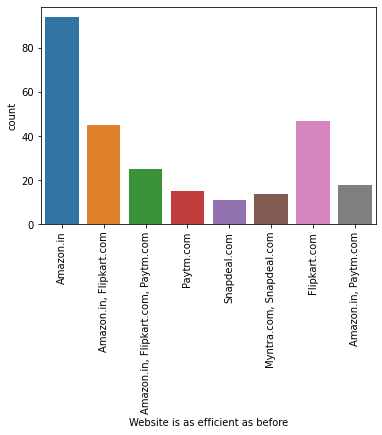

In [45]:
# Website is as efficient as before
sns.countplot(x="Website is as efficient as before", data=df)
plt.xticks(rotation='90')
plt.xlabel('Website is as efficient as before')

df['Website is as efficient as before'].value_counts()

- Majority customers agree to Amazon.in that Website is as efficient as before

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

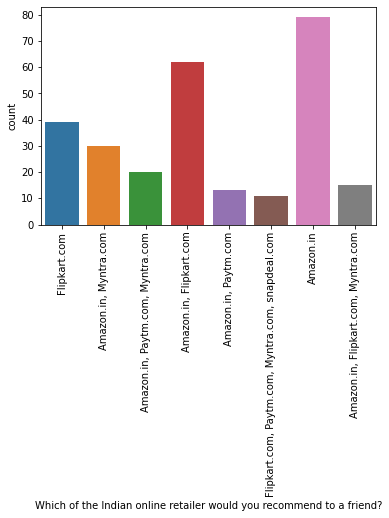

In [46]:
# Which of the Indian online retailer would you recommend to a friend?
sns.countplot(x="Which of the Indian online retailer would you recommend to a friend?", data=df)
plt.xticks(rotation='90')
plt.xlabel('Which of the Indian online retailer would you recommend to a friend?')

df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

- Majority customers agree to Amazon.in to recommend to a friend.